# Step 0: Import libraries and Dataset

In [1]:
# Importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing dataset
dataset = pd.read_csv('diabetes.csv')

# Step 1: Descriptive Statistics

In [3]:
# Preview data
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Dataset dimensions - (rows, columns)
dataset.shape

(768, 9)

In [5]:
# Features data-type
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# Statistical summary
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [7]:
# Count of null values
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Observations:
1. There are a total of 768 records and 9 features in the dataset.
2. Each feature can be either of integer or float dataype.
3. Some features like Glucose, Blood pressure , Insulin, BMI have zero values which represent missing data.
4. There are zero NaN values in the dataset.
5. In the outcome column, 1 represents diabetes positive and 0 represents diabetes negative.

# Step 2: Data Visualization

<Axes: xlabel='Outcome', ylabel='count'>

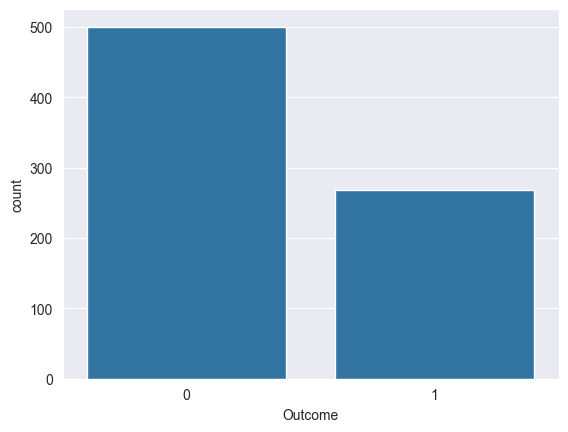

In [8]:
# Outcome countplot
sns.countplot(x = 'Outcome',data = dataset)

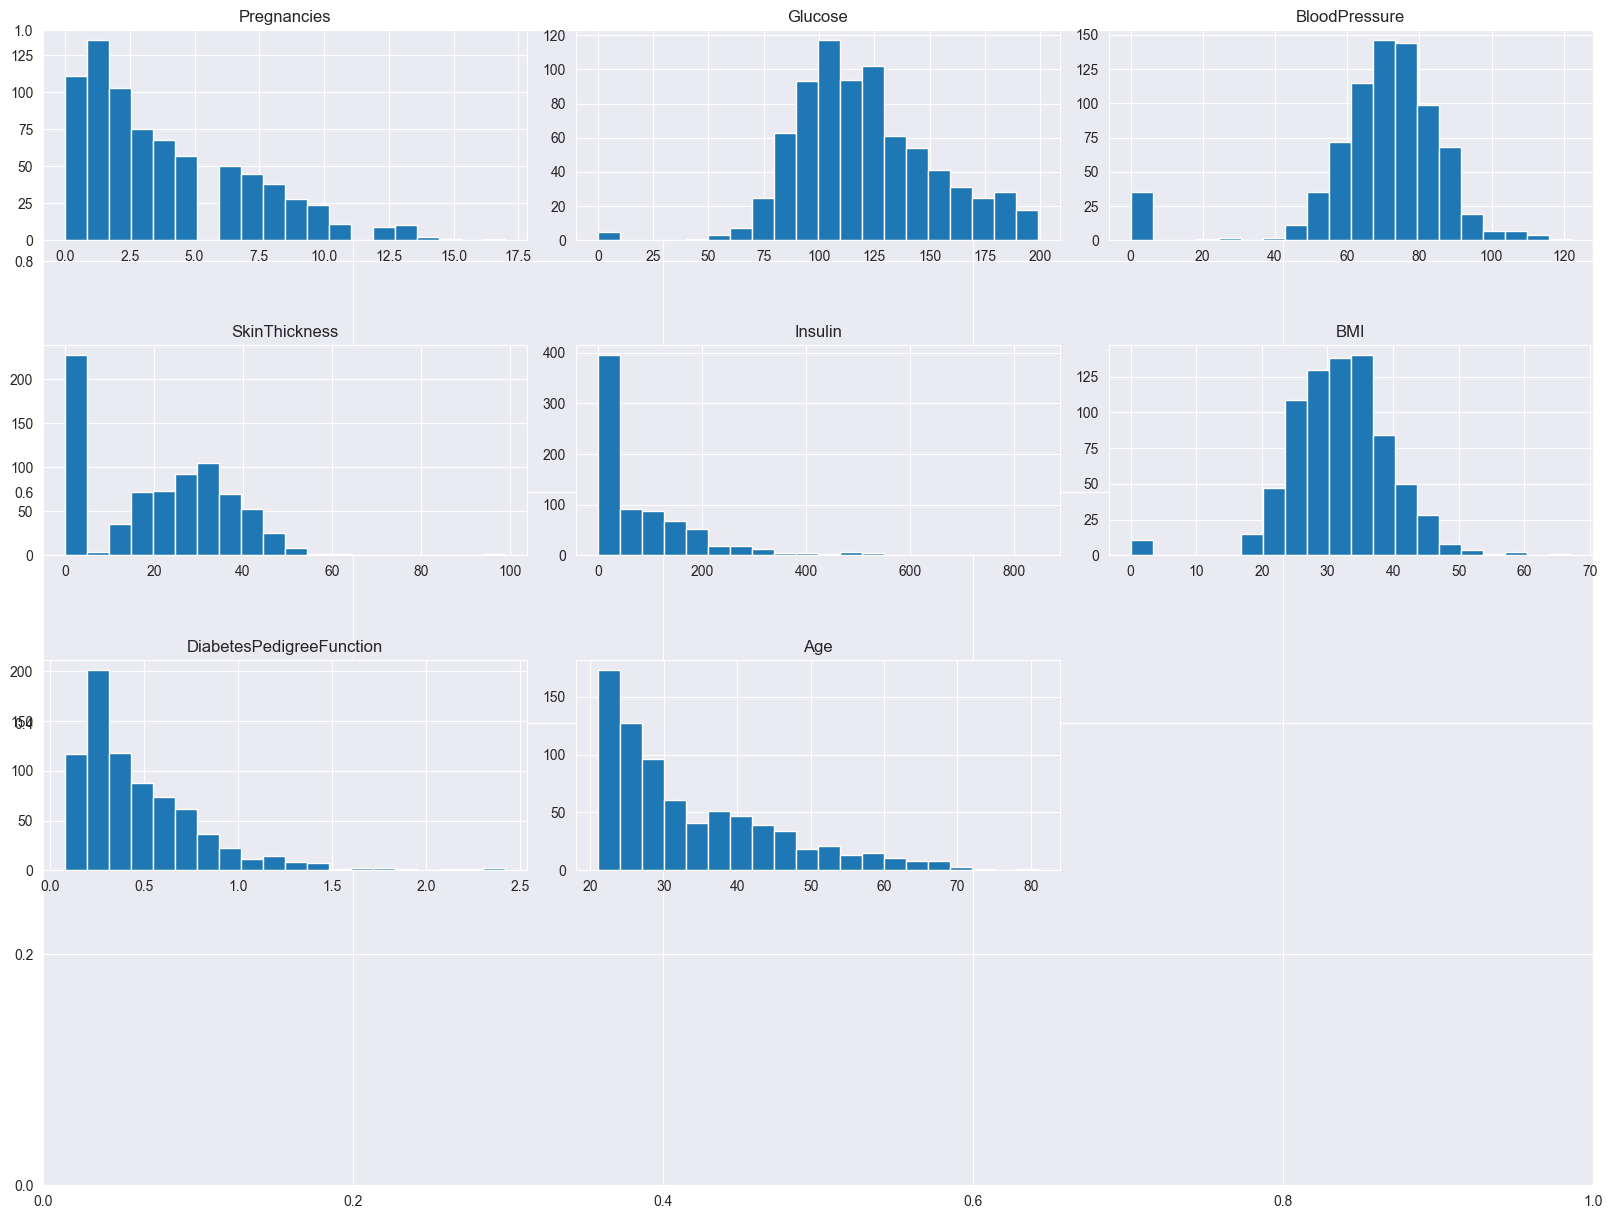

In [9]:
# Histogram of each feature
import itertools

col = dataset.columns[:8]
plt.subplots(figsize = (20, 15))
length = len(col)

for i, j in itertools.zip_longest(col, range(length)):
    plt.subplot((length // 2), 3, j + 1)
    plt.subplots_adjust(wspace = 0.1,hspace = 0.5)
    dataset[i].hist(bins = 20)
    plt.title(i)
plt.show()

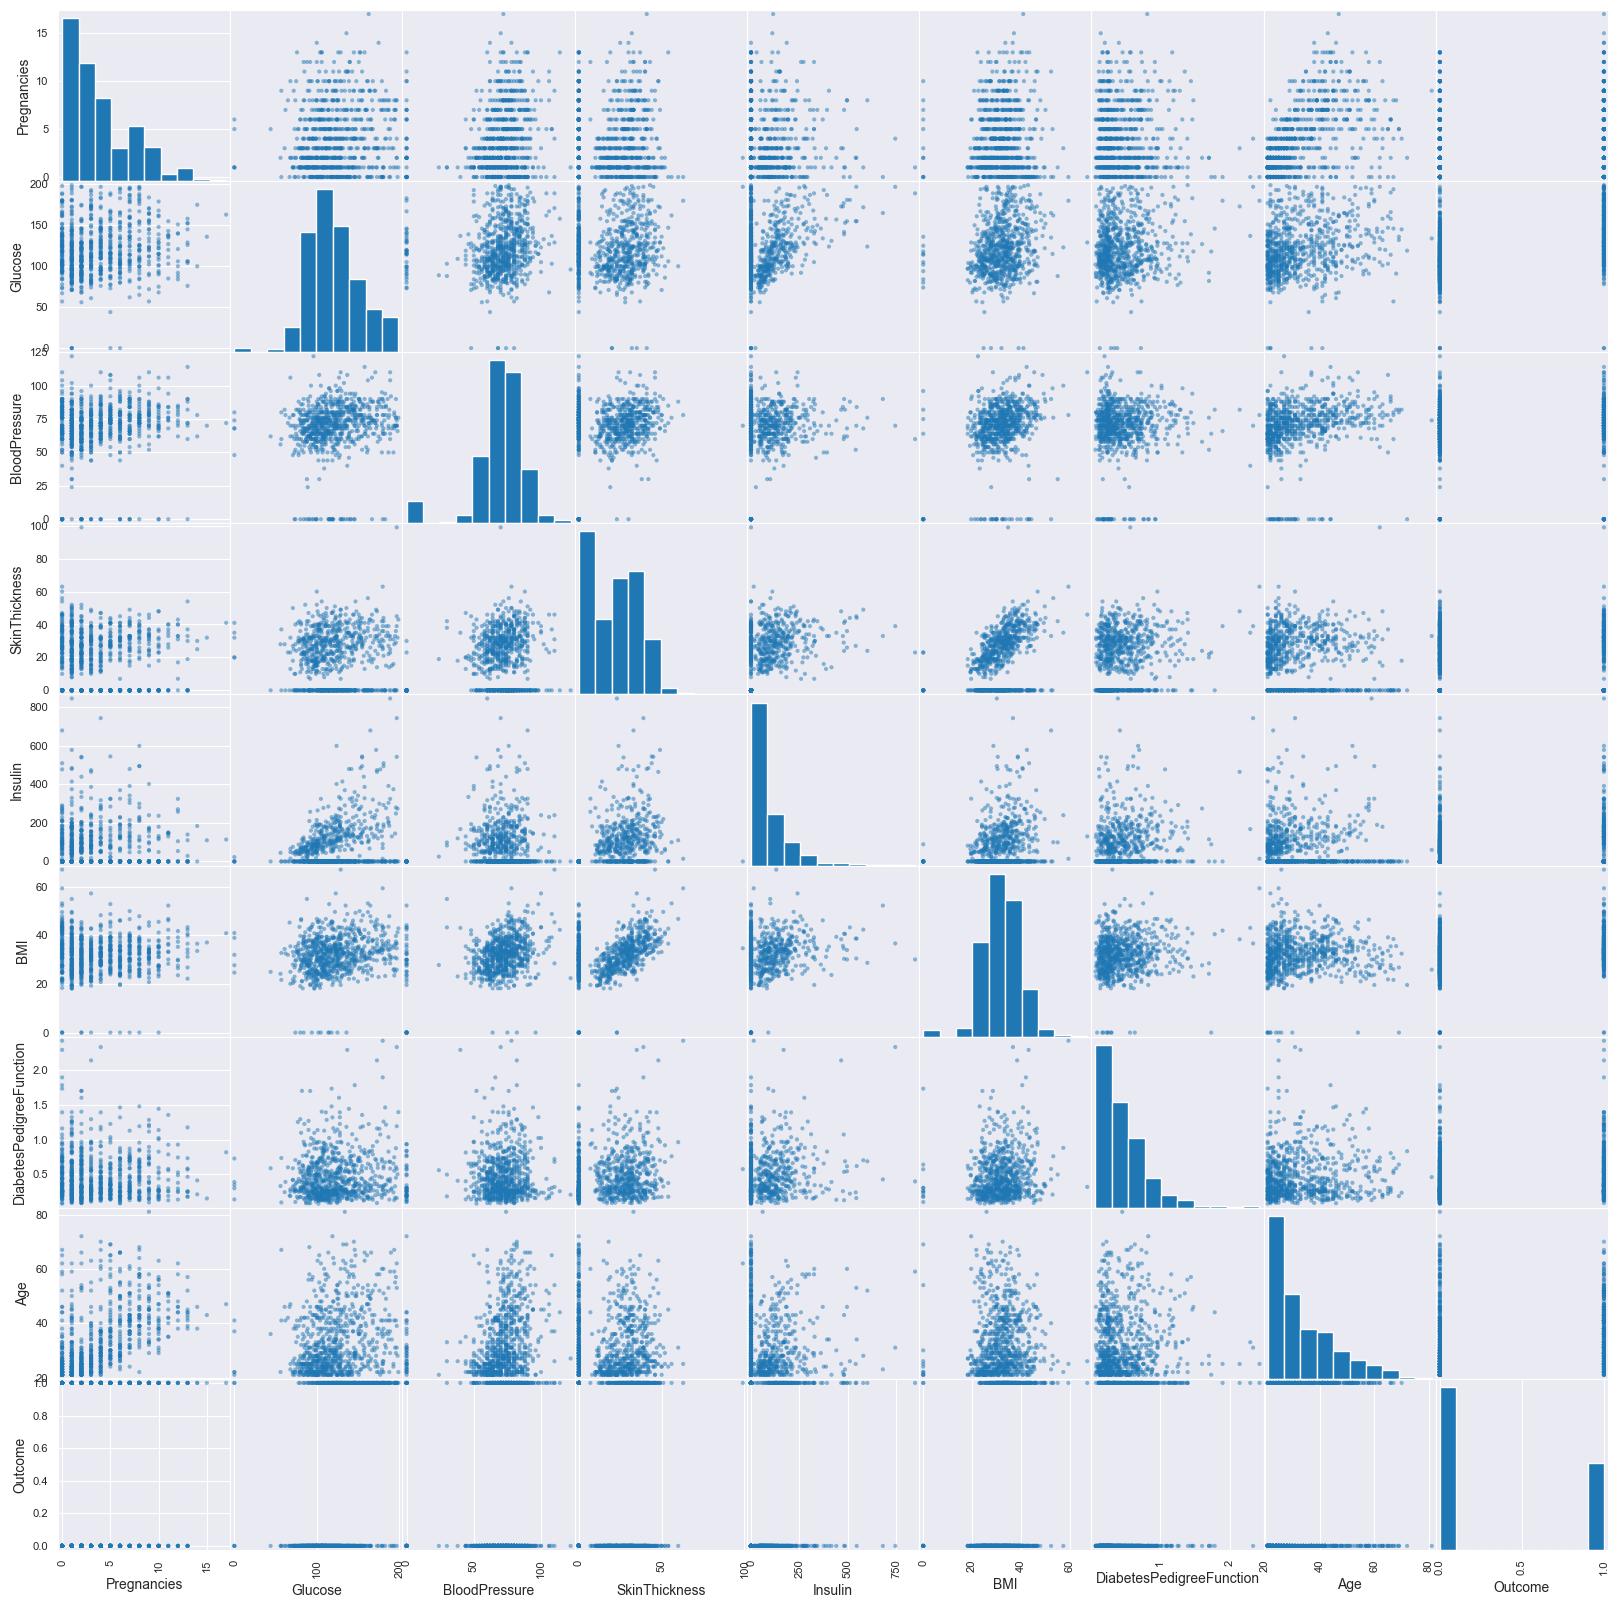

In [10]:
from pandas.plotting import scatter_matrix
scatter_matrix(dataset, figsize=(20, 20));

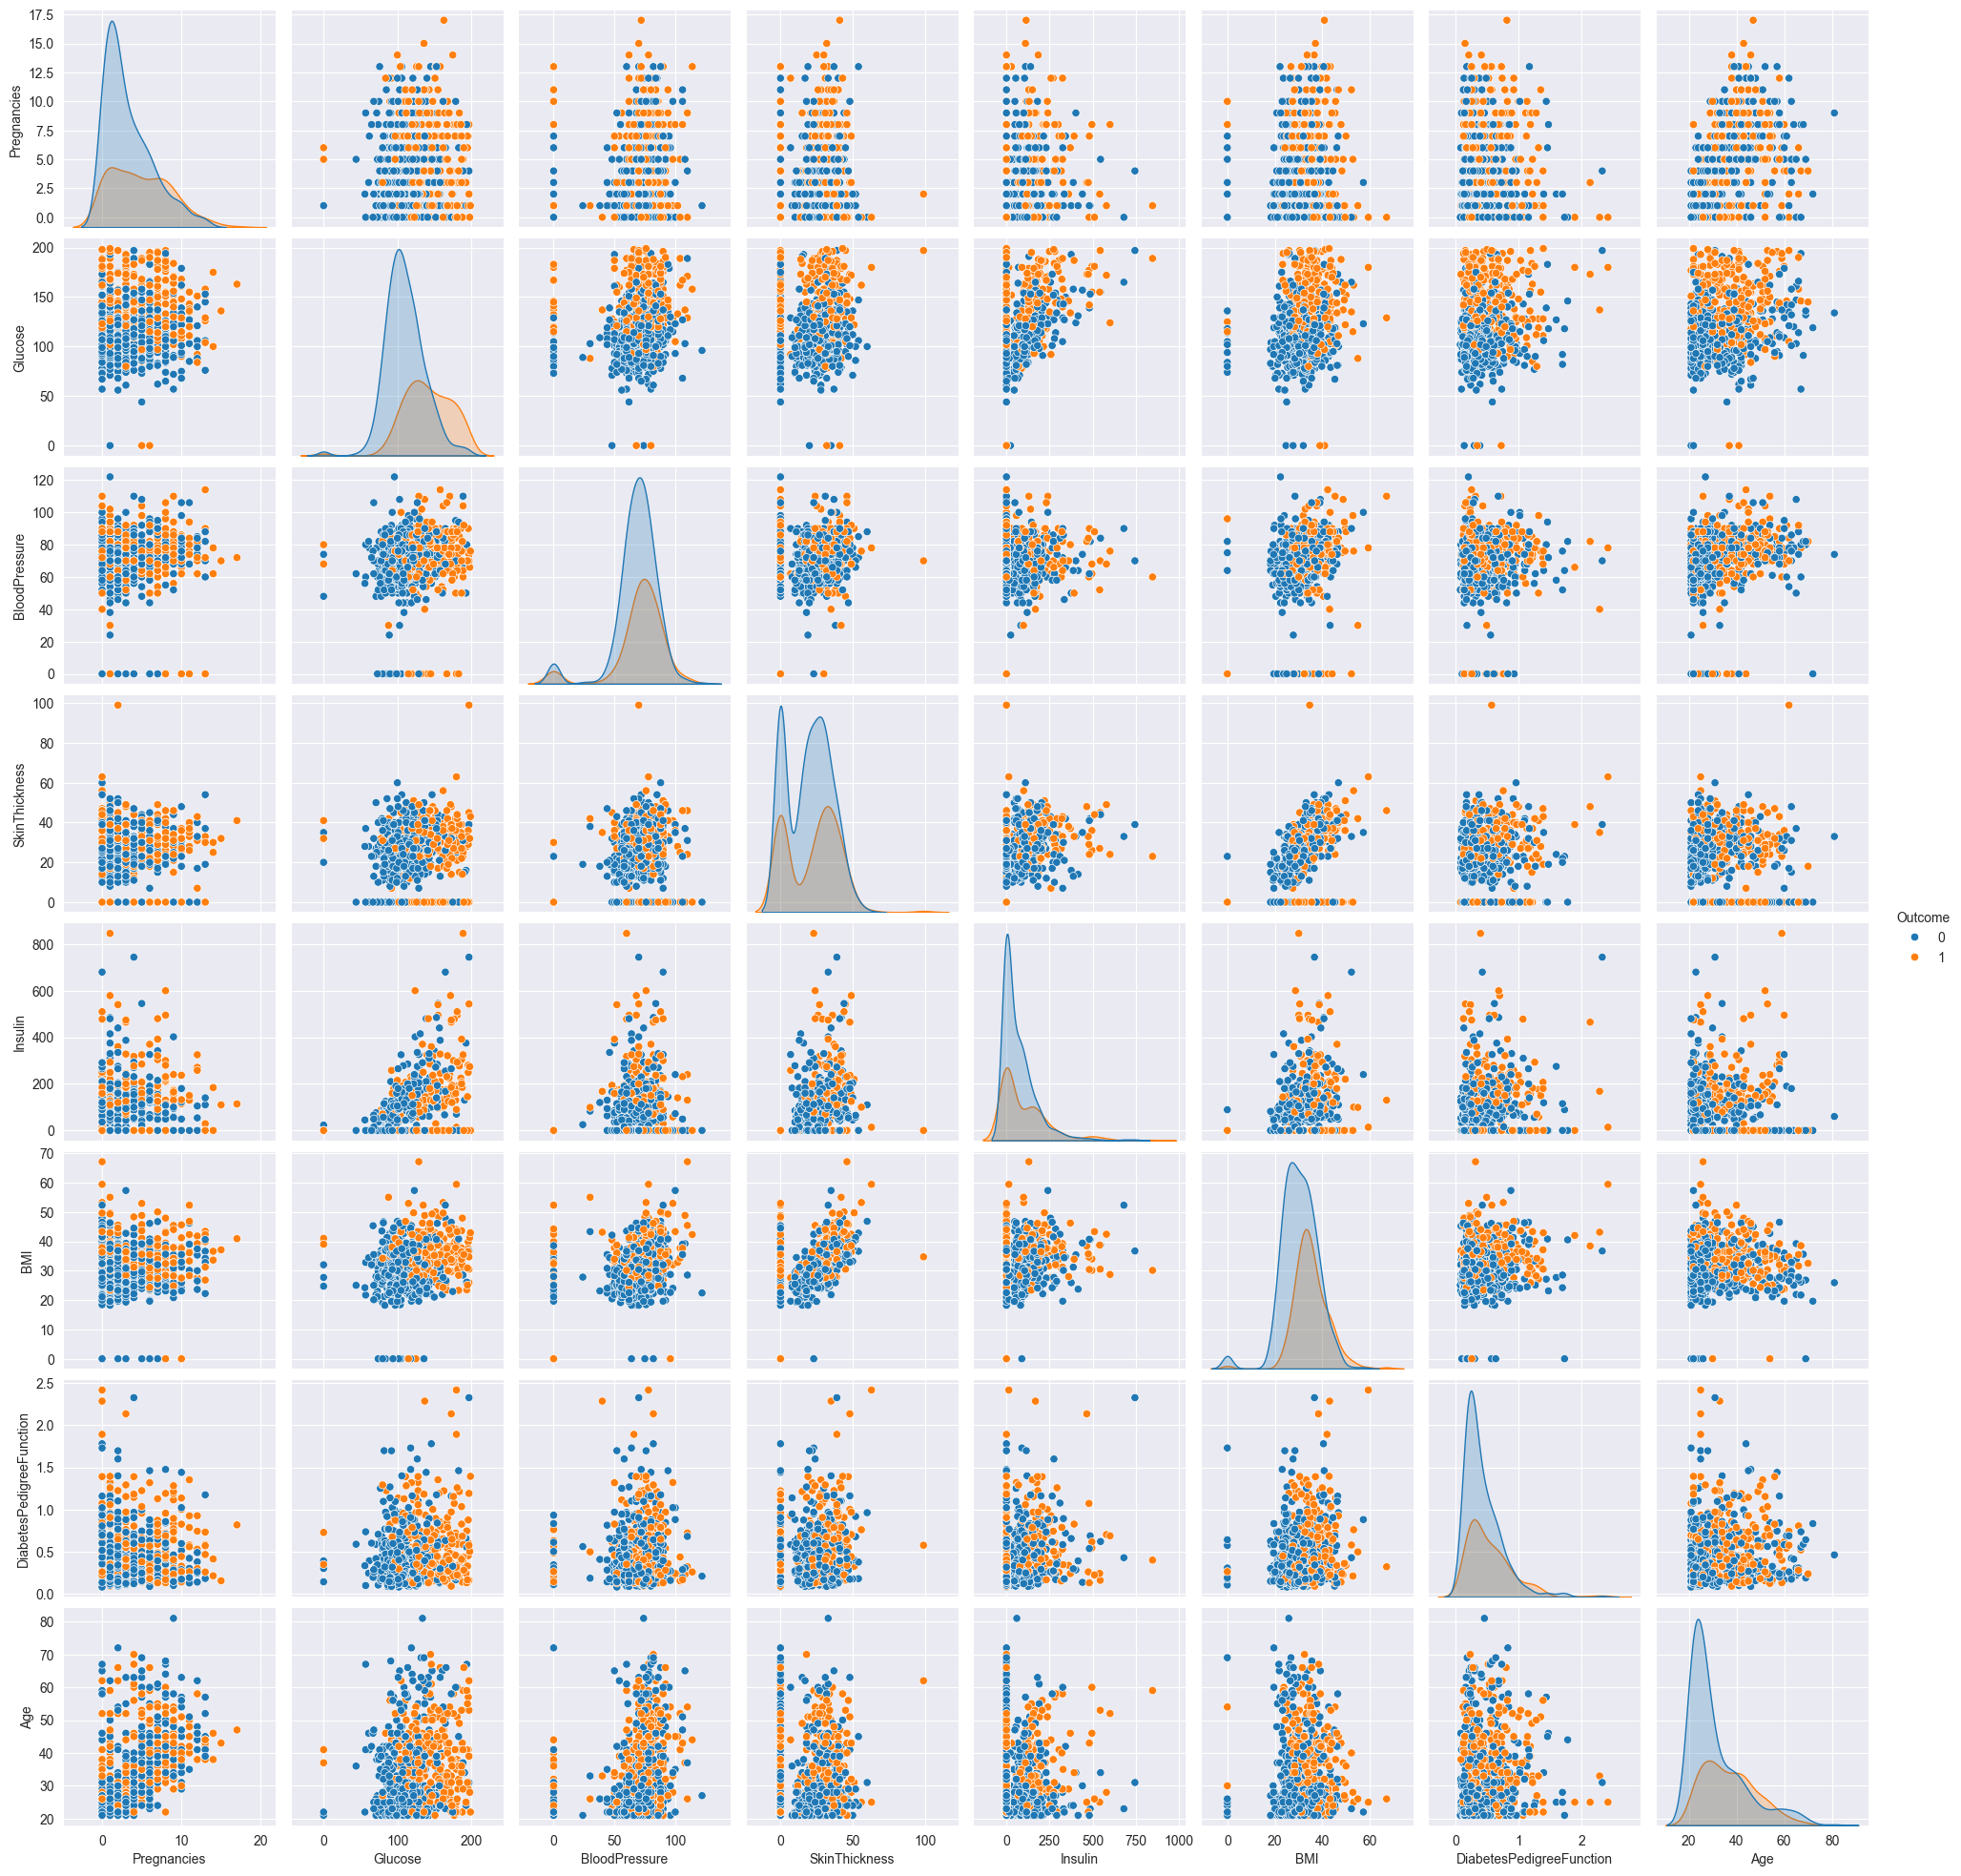

In [11]:
# Pairplot 
sns.pairplot(data = dataset, hue = 'Outcome')
plt.show()

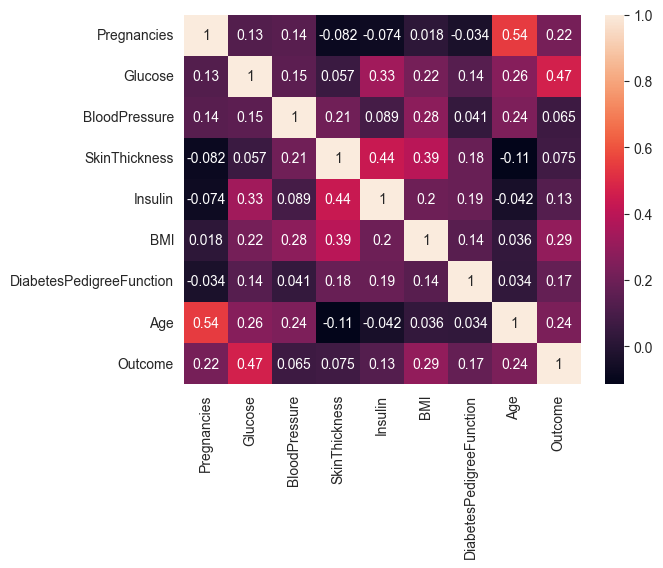

In [12]:
# Heatmap
sns.heatmap(dataset.corr(), annot = True)
plt.show()

## Observations:
1. The countplot tells us that the dataset is imbalanced, as number of patients who don't have diabetes is more than those who do.
2. From the correaltion heatmap, we can see that there is a high correlation between Outcome and [Glucose,BMI,Age,Insulin]. We can select these features to accept input from the user and predict the outcome.

# Step 3: Data Preprocessing

In [13]:
dataset_new = dataset

In [14]:
# Replacing zero values with NaN
dataset_new[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]] = dataset_new[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]].replace(0, np.NaN) 

In [15]:
# Count of NaN
dataset_new.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [16]:
# Replacing NaN with mean values
dataset_new["Glucose"].fillna(dataset_new["Glucose"].mean(), inplace = True)
dataset_new["BloodPressure"].fillna(dataset_new["BloodPressure"].mean(), inplace = True)
dataset_new["SkinThickness"].fillna(dataset_new["SkinThickness"].mean(), inplace = True)
dataset_new["Insulin"].fillna(dataset_new["Insulin"].mean(), inplace = True)
dataset_new["BMI"].fillna(dataset_new["BMI"].mean(), inplace = True)

In [17]:
# Statistical summary
dataset_new.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.000000,6.000000,17.00
Glucose,768.0,121.686763,30.435949,44.000,99.75000,117.000000,140.250000,199.00
BloodPressure,768.0,72.405184,12.096346,24.000,64.00000,72.202592,80.000000,122.00
SkinThickness,768.0,29.153420,8.790942,7.000,25.00000,29.153420,32.000000,99.00
Insulin,768.0,155.548223,85.021108,14.000,121.50000,155.548223,155.548223,846.00
BMI,768.0,32.457464,6.875151,18.200,27.50000,32.400000,36.600000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.626250,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.000000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.000000,1.00


In [18]:
# Feature scaling using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
dataset_scaled = sc.fit_transform(dataset_new)

In [19]:
dataset_scaled = pd.DataFrame(dataset_scaled)

In [20]:
# Selecting features - [Glucose, Insulin, BMI, Age]
X = dataset_scaled.iloc[:, [1, 4, 5, 7]].values
Y = dataset_scaled.iloc[:, 8].values

In [21]:
# Splitting X and Y
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42, stratify = dataset_new['Outcome'] )

In [22]:
# Checking dimensions
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (614, 4)
X_test shape: (154, 4)
Y_train shape: (614,)
Y_test shape: (154,)


# Step 4: Data Modelling

In [23]:
# Logistic Regression Algorithm
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 42)
logreg.fit(X_train, Y_train)

LogisticRegression(random_state=42)

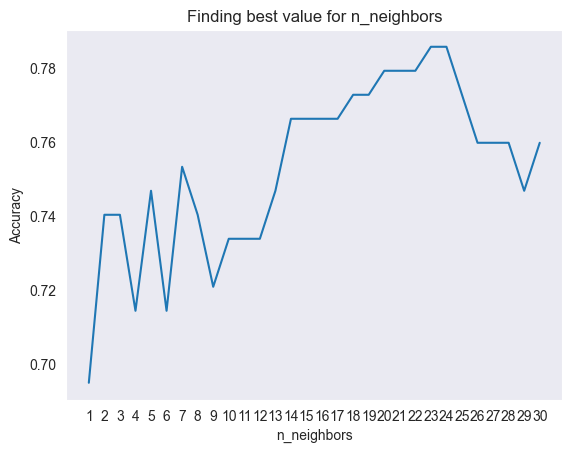

Highest value: 0.7857142857142857


In [24]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import pandas as pd

X_axis = list(range(1, 31))
acc = []  # Use a list instead of Series
x = range(1, 31)

for i in x:
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train, Y_train)
    prediction = knn_model.predict(X_test)
    acc.append(metrics.accuracy_score(Y_test, prediction))  # Note the correct order: (Y_test, prediction)

acc = pd.Series(acc)  # Convert list to Series once the loop is done

plt.plot(X_axis, acc)
plt.xticks(x)
plt.title("Finding best value for n_neighbors")
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

print('Highest value:', acc.max())

In [25]:
# K nearest neighbors Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 24, metric = 'minkowski', p = 2)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=24)

In [26]:
# Support Vector Classifier Algorithm
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 42)
svc.fit(X_train, Y_train)

SVC(kernel='linear', random_state=42)

In [27]:
# Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, Y_train)

GaussianNB()

In [28]:
# Decision tree Algorithm
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dectree.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [29]:
# Random forest Algorithm
from sklearn.ensemble import RandomForestClassifier
ranfor = RandomForestClassifier(n_estimators = 11, criterion = 'entropy', random_state = 42)
ranfor.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=11, random_state=42)

In [30]:
# Making predictions on test dataset
Y_pred_logreg = logreg.predict(X_test)
Y_pred_knn = knn.predict(X_test)
Y_pred_svc = svc.predict(X_test)
Y_pred_nb = nb.predict(X_test)
Y_pred_dectree = dectree.predict(X_test)
Y_pred_ranfor = ranfor.predict(X_test)

# Step 5: Model Evaluation

In [31]:
# Evaluating using accuracy_score metric
from sklearn.metrics import accuracy_score
accuracy_logreg = accuracy_score(Y_test, Y_pred_logreg)
accuracy_knn = accuracy_score(Y_test, Y_pred_knn)
accuracy_svc = accuracy_score(Y_test, Y_pred_svc)
accuracy_nb = accuracy_score(Y_test, Y_pred_nb)
accuracy_dectree = accuracy_score(Y_test, Y_pred_dectree)
accuracy_ranfor = accuracy_score(Y_test, Y_pred_ranfor)

In [32]:
# Accuracy on test set
print("Logistic Regression: " + str(accuracy_logreg * 100))
print("K Nearest neighbors: " + str(accuracy_knn * 100))
print("Support Vector Classifier: " + str(accuracy_svc * 100))
print("Naive Bayes: " + str(accuracy_nb * 100))
print("Decision tree: " + str(accuracy_dectree * 100))
print("Random Forest: " + str(accuracy_ranfor * 100))

Logistic Regression: 72.07792207792207
K Nearest neighbors: 78.57142857142857
Support Vector Classifier: 73.37662337662337
Naive Bayes: 71.42857142857143
Decision tree: 68.18181818181817
Random Forest: 75.97402597402598


In [33]:
#From the above comparison, we can observe that K Nearest neighbors gets the highest accuracy of 78.57 %

In [34]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_knn)
cm
# Get predicted probabilities
probs = knn.predict_proba(X_test)[:, 1]  # Probability of class '1' (diabetic)

# Convert probabilities into risk categories
risk_categories = []
for prob in probs:
    if prob < 0.33:
        risk_categories.append("Low Risk")
    elif prob < 0.66:
        risk_categories.append("Moderate Risk")
    else:
        risk_categories.append("High Risk")

# Now risk_categories contains the three-level risk assessment
# Let's check a few
for i in range(5):
    print(f"Probability: {probs[i]:.2f} -> Risk: {risk_categories[i]}")

Probability: 0.71 -> Risk: High Risk
Probability: 0.17 -> Risk: Low Risk
Probability: 0.21 -> Risk: Low Risk
Probability: 0.33 -> Risk: Moderate Risk
Probability: 0.04 -> Risk: Low Risk


<Axes: >

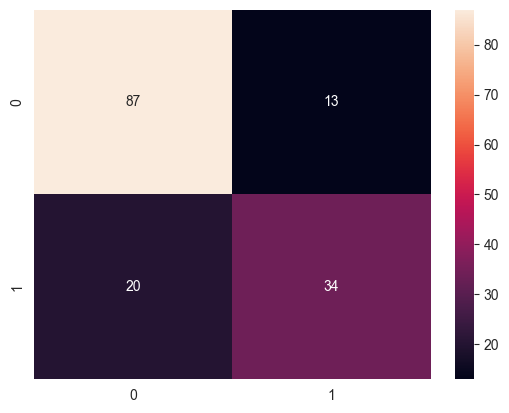

In [35]:
# Heatmap of Confusion matrix
sns.heatmap(pd.DataFrame(cm), annot=True)

In [36]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_knn))

              precision    recall  f1-score   support

         0.0       0.81      0.87      0.84       100
         1.0       0.72      0.63      0.67        54

    accuracy                           0.79       154
   macro avg       0.77      0.75      0.76       154
weighted avg       0.78      0.79      0.78       154



In [37]:
import pickle

# Save the trained KNN model
with open('knn_model.pkl', 'wb') as model_file:
    pickle.dump(knn, model_file)

# Save the MinMaxScaler
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(sc, scaler_file)

print("✅ Pickle files saved successfully: knn_model.pkl and scaler.pkl")

✅ Pickle files saved successfully: knn_model.pkl and scaler.pkl


In [38]:
!pip install streamlit
import streamlit as st
print("Streamlit is working!")


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Streamlit is working!


In [39]:
!pip install streamlit
import sys
print(sys.executable)
import streamlit as st
import numpy as np
import pickle

# Load model and scaler
with open('scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

with open('knn_model.pkl', 'rb') as f:
    model = pickle.load(f)

# Streamlit input interface
st.title("Heart Disease Risk Predictor")

# Example: If your model was trained on these 4 features
glucose = st.number_input("Glucose", 0.0, 300.0, step=1.0)
insulin = st.number_input("Insulin", 0.0, 900.0, step=1.0)
bmi = st.number_input("BMI", 0.0, 60.0, step=0.1)
age = st.number_input("Age", 1, 120, step=1)

if st.button("Predict Risk Level"):
    # Prepare input in the correct order and shape
    input_data = np.array([[glucose, insulin, bmi, age]])

    # Scale input
    scaled_input = scaler.transform(input_data)

    # Predict probability of positive class (e.g., diabetic)
    prob = model.predict_proba(scaled_input)[0][1]

    # Risk classification
    if prob < 0.33:
        risk = "Low Risk"
    elif prob < 0.66:
        risk = "Moderate Risk"
    else:
        risk = "High Risk"

    st.write(f"Predicted Risk Level: **{risk}** (Probability: {prob:.2f})")


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
/Users/kumudbhardwaj/Downloads/Healthcare.AI-main/venv/bin/python


2025-05-04 20:27:07.631 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-04 20:27:07.770 
  command:

    streamlit run /Users/kumudbhardwaj/Downloads/Healthcare.AI-main/venv/lib/python3.9/site-packages/ipykernel_launcher.py [ARGUMENTS]
2025-05-04 20:27:07.771 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-04 20:27:07.771 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-04 20:27:07.772 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-04 20:27:07.772 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-04 20:27:07.773 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05

Brier Score Loss: 0.1560


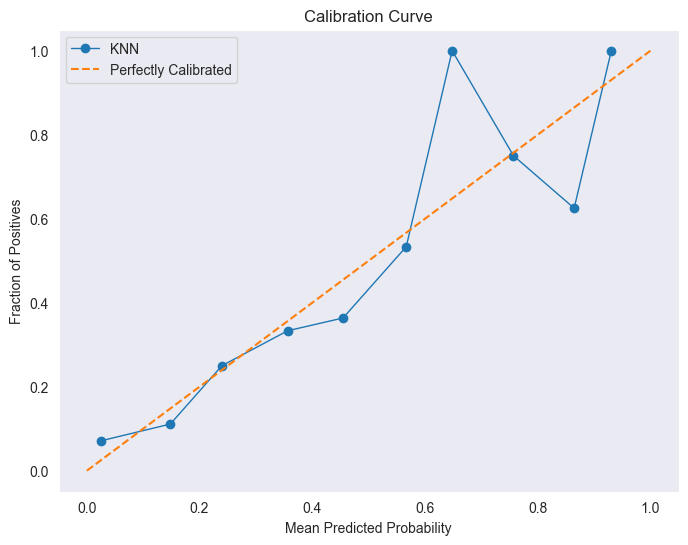

In [40]:
from sklearn.calibration import calibration_curve
from sklearn.metrics import brier_score_loss
import matplotlib.pyplot as plt

# Calibration curve and Brier Score
y_prob = knn.predict_proba(X_test)[:, 1]  # predicted probability of class 1
y_true = Y_test

# Compute Brier Score
brier_score = brier_score_loss(y_true, y_prob)
print(f"Brier Score Loss: {brier_score:.4f}")

# Plot Calibration Curve
prob_true, prob_pred = calibration_curve(y_true, y_prob, n_bins=10, strategy='uniform')

plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', linewidth=1, label='KNN')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly Calibrated')
plt.title('Calibration Curve')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.legend()
plt.grid()
plt.show()

Confusion Matrix:
[[87 13]
 [20 34]]


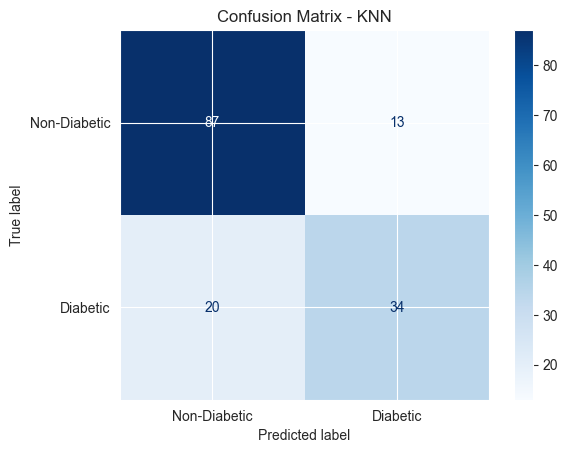

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrix
cm = confusion_matrix(y_true, knn.predict(X_test))
print("Confusion Matrix:")
print(cm)

# Plot Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-Diabetic", "Diabetic"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - KNN")
plt.show()

In [42]:
def expected_calibration_error(y_true, y_prob, n_bins=10):
    bins = np.linspace(0, 1, n_bins + 1)
    binids = np.digitize(y_prob, bins) - 1
    ece = 0.0
    for i in range(n_bins):
        bin_mask = binids == i
        if np.any(bin_mask):
            bin_acc = y_true[bin_mask].mean()
            bin_conf = y_prob[bin_mask].mean()
            ece += np.abs(bin_acc - bin_conf) * bin_mask.mean()
    return ece

ece = expected_calibration_error(y_true, y_prob, n_bins=10)
print(f"Expected Calibration Error (ECE): {ece:.4f}")

Expected Calibration Error (ECE): 0.0703


In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.stats import ttest_ind

# Load the dataset
dataset = pd.read_csv('diabetes.csv')

# Data Preprocessing
dataset_new = dataset.copy()  # Create a copy to avoid modifying the original data
dataset_new[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]] = dataset_new[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]].replace(0, np.NaN)
dataset_new["Glucose"].fillna(dataset_new["Glucose"].mean(), inplace=True)
dataset_new["BloodPressure"].fillna(dataset_new["BloodPressure"].mean(), inplace=True)
dataset_new["SkinThickness"].fillna(dataset_new["SkinThickness"].mean(), inplace=True)
dataset_new["Insulin"].fillna(dataset_new["Insulin"].mean(), inplace=True)
dataset_new["BMI"].fillna(dataset_new["BMI"].mean(), inplace=True)

# Feature scaling using MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
dataset_scaled = sc.fit_transform(dataset_new)
dataset_scaled = pd.DataFrame(dataset_scaled, columns=dataset_new.columns) # Keep columns

# Selecting features - [Glucose, Insulin, BMI, Age]
X = dataset_scaled.iloc[:, [1, 4, 5, 7]].values
Y = dataset_scaled.iloc[:, 8].values

# Splitting X and Y
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42, stratify=dataset['Outcome'])

# Models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=24, metric='minkowski', p=2),  # Best n_neighbors from your code
    'Support Vector Classifier': SVC(kernel='linear', random_state=42),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(criterion='entropy', random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=11, criterion='entropy', random_state=42)  # n_estimators=11
}

results = {}
for model_name, model in models.items():
    # Use cross-validation for a better estimate of performance
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores_acc = cross_val_score(model, X, Y, cv=kf, scoring='accuracy')
    cv_scores_prec = cross_val_score(model, X, Y, cv=kf, scoring='precision')
    cv_scores_rec = cross_val_score(model, X, Y, cv=kf, scoring='recall')
    cv_scores_f1 = cross_val_score(model, X, Y, cv=kf, scoring='f1')

    results[model_name] = {
        'Accuracy': {'mean': np.mean(cv_scores_acc), 'std': np.std(cv_scores_acc), 'values': cv_scores_acc},
        'Precision': {'mean': np.mean(cv_scores_prec), 'std': np.std(cv_scores_prec), 'values': cv_scores_prec},
        'Recall': {'mean': np.mean(cv_scores_rec), 'std': np.std(cv_scores_rec), 'values': cv_scores_rec},
        'F1-score': {'mean': np.mean(cv_scores_f1), 'std': np.std(cv_scores_f1), 'values': cv_scores_f1},
    }

def calculate_p_values(results, baseline_model='Logistic Regression'): # Changed baseline
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
    for model_name in results:
        if model_name != baseline_model:
            results[model_name]['p-value'] = {}
            for metric in metrics:
                try:
                    _, p_value = ttest_ind(results[baseline_model][metric]['values'], results[model_name][metric]['values'])
                    results[model_name]['p-value'][metric] = p_value
                except Exception as e:
                    print(f"Error calculating p-value for {model_name} and {metric}: {e}")
                    results[model_name]['p-value'][metric] = np.nan
        else:
            results[model_name]['p-value'] = {m: np.nan for m in metrics}
    return results

results = calculate_p_values(results)

# Print the table
print("Table: Performance of Machine Learning Models")
print("-------------------------------------------------------------------------------------------------------------------")
print(f"{'ML Models':<25} {'Accuracy':<20} {'Precision':<20} {'Recall':<20} {'F1-score':<20} {'p-value'}")
print("-------------------------------------------------------------------------------------------------------------------")

for model_name, model_data in results.items():
    accuracy_str = f"{model_data['Accuracy']['mean']:.4f} ±{model_data['Accuracy']['std']:.5f}"
    precision_str = f"{model_data['Precision']['mean']:.4f} ±{model_data['Precision']['std']:.5f}"
    recall_str = f"{model_data['Recall']['mean']:.4f} ±{model_data['Recall']['std']:.5f}"
    f1_str = f"{model_data['F1-score']['mean']:.4f} ±{model_data['F1-score']['std']:.5f}"
    p_value_str = {metric: f"{model_data['p-value'][metric]:.4f}" if not np.isnan(model_data['p-value'][metric]) else "N/A" for metric in ['Accuracy', 'Precision', 'Recall', 'F1-score']}

    print(f"{model_name:<25} {accuracy_str:<20} {precision_str:<20} {recall_str:<20} {f1_str:<20} "
          f"{p_value_str['Accuracy']:<10}, {p_value_str['Precision']:<10}, {p_value_str['Recall']:<10}, {p_value_str['F1-score']:<10}")
print("-------------------------------------------------------------------------------------------------------------------")


Table: Performance of Machine Learning Models
-------------------------------------------------------------------------------------------------------------------
ML Models                 Accuracy             Precision            Recall               F1-score             p-value
-------------------------------------------------------------------------------------------------------------------
Logistic Regression       0.7618 ±0.02285      0.7211 ±0.05236      0.5250 ±0.04078      0.6049 ±0.02156      N/A       , N/A       , N/A       , N/A       
K-Nearest Neighbors       0.7813 ±0.02012      0.7143 ±0.05165      0.6268 ±0.02493      0.6659 ±0.01643      0.2356    , 0.8585    , 0.0028    , 0.0020    
Support Vector Classifier 0.7631 ±0.02396      0.7169 ±0.04554      0.5357 ±0.04547      0.6108 ±0.02777      0.9394    , 0.9086    , 0.7350    , 0.7459    
Naive Bayes               0.7605 ±0.02237      0.7002 ±0.06545      0.5582 ±0.05911      0.6171 ±0.03564      0.9372    , 0.6322    ,